In [102]:
import pandas as pd
import numpy as np
from fastai.vision.all import *

from matplotlib import pyplot as plt
%matplotlib inline


In [103]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

Text(0.5, 1.0, 'Roller Coaster Tezlik')

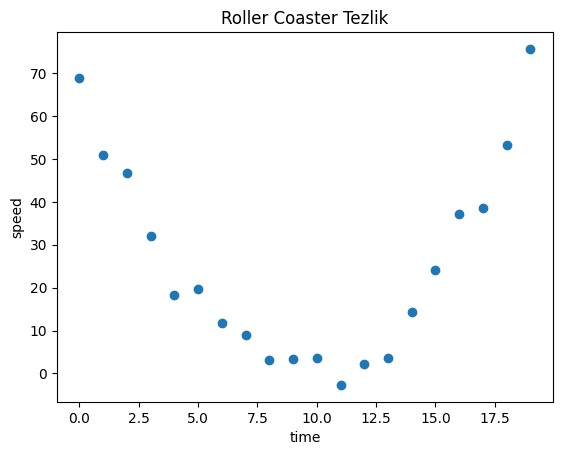

In [104]:
speed = torch.randn(20)*3 + 0.75*(time - 9.5)**2 + 1

plt.scatter(time, speed)
plt.xlabel('time')
plt.ylabel('speed')
plt.title('Roller Coaster Tezlik')

=> to create quadratic function

In [105]:
def f(time, params):
      """Quadratic function"""
      a, b, c = params
      return a*(time**2) + (b*time) + c 

=> MSE (Mean Sqaured Error)

In [106]:
# loss function

def mse(preds, targets):
          return ((preds - targets)**2).mean()

=> to do 7 process step by step

=> first step Initioalize

In [107]:
params = torch.randn(3).requires_grad_()
params

tensor([-0.0759,  1.0895,  0.3682], requires_grad=True)

In [108]:
preds = f(time, params)

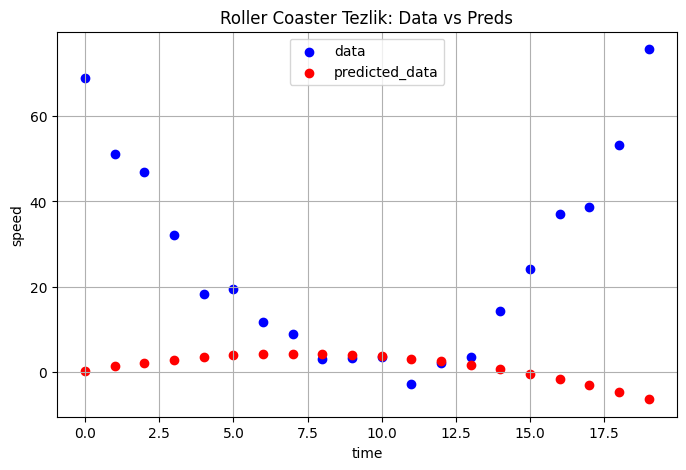

In [ ]:
def show_preds(preds, time=None, targets=None,
               title='Speed: Actual vs Predicted',
               xlabel='time', ylabel='speed',
               pred_style='ro', target_style='bo', legend_loc='best'):
    """
    preds: Tensor yoki array, bashorat qilingan qiymatlar
    time: Tensor yoki array, vaqt nuqtalari; agar None bo‘lsa, 0,1,2,... indekslari ishlatiladi
    targets: Tensor yoki array, haqiqiy ma’lumotlar; yo‘q bo‘lsa, faqat preds chiziladi
    Stil: e.g., 'ro' = qizil doira, 'bo' = ko‘k doira
    """
    # to change to NumPy
    preds = preds.detach().cpu().numpy() if isinstance(preds, torch.Tensor) else np.asarray(preds)
    if time is None:
        time = np.arange(len(preds))
    else:
        time = time.detach().cpu().numpy() if isinstance(time, torch.Tensor) else np.asarray(time)
    if targets is not None:
        targets = targets.detach().cpu().numpy() if isinstance(targets, torch.Tensor) else np.asarray(targets)
        if not (len(time) == len(preds) == len(targets)):
            raise ValueError("time, preds va targets bir xil uzunlikda bo‘lishi kerak")

    plt.figure(figsize=(8, 5))
    
    # actual point 

    if targets is not None:
        plt.scatter(time, targets, c=target_style[0], label='data', marker=target_style[1] if len(target_style)>1 else 'o')
    
    # Prediction

    plt.scatter(time, preds, c=pred_style[0], label='predicted_data', marker=pred_style[1] if len(pred_style)>1 else 'o')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=legend_loc)
    plt.grid(True)
    plt.show()


# to end line


show_preds(preds, time=time, targets=speed,
           title='Roller Coaster Tezlik: Data vs Preds',
           xlabel='time', ylabel='speed',
           pred_style='ro', target_style='bo')


=> to calculate loss

In [110]:
loss = mae(preds, speed)
loss

TensorBase(25.1399, grad_fn=<AliasBackward0>)

=> to calculate Gradient

In [111]:
loss.backward()
params.grad

tensor([-72.5000,  -4.5000,  -0.5000])

=> 5 process Step

In [112]:
lr = 0.005
params.data -= lr*params.grad.data
params.grad = None

=> turn 2 step again

In [113]:
preds = f(time, params)

# to canculate predict for a new take result 

mae(preds, speed)

TensorBase(40.8406, grad_fn=<AliasBackward0>)

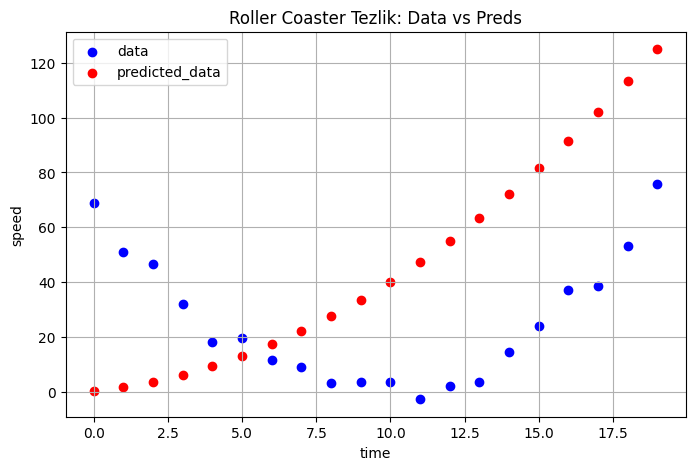

In [ ]:
def show_preds(preds, time=None, targets=None,
               title='Speed: Actual vs Predicted',
               xlabel='time', ylabel='speed',
               pred_style='ro', target_style='bo', legend_loc='best'):
    """
    preds: Tensor yoki array, bashorat qilingan qiymatlar
    time: Tensor yoki array, vaqt nuqtalari; agar None bo‘lsa, 0,1,2,... indekslari ishlatiladi
    targets: Tensor yoki array, haqiqiy ma’lumotlar; yo‘q bo‘lsa, faqat preds chiziladi
    Stil: e.g., 'ro' = qizil doira, 'bo' = ko‘k doira
    """
    # to change to Numpy

    preds = preds.detach().cpu().numpy() if isinstance(preds, torch.Tensor) else np.asarray(preds)
    if time is None:
        time = np.arange(len(preds))
    else:
        time = time.detach().cpu().numpy() if isinstance(time, torch.Tensor) else np.asarray(time)
    if targets is not None:
        targets = targets.detach().cpu().numpy() if isinstance(targets, torch.Tensor) else np.asarray(targets)
        if not (len(time) == len(preds) == len(targets)):
            raise ValueError("time, preds va targets bir xil uzunlikda bo‘lishi kerak")

    plt.figure(figsize=(8, 5))
    
    # actual points 

    if targets is not None:
        plt.scatter(time, targets, c=target_style[0], label='data', marker=target_style[1] if len(target_style)>1 else 'o')
    
    # Predictions

    plt.scatter(time, preds, c=pred_style[0], label='predicted_data', marker=pred_style[1] if len(pred_style)>1 else 'o')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=legend_loc)
    plt.grid(True)
    plt.show()


# to plot result

show_preds(preds, time=time, targets=speed,
           title='Roller Coaster Tezlik: Data vs Preds',
           xlabel='time', ylabel='speed',
           pred_style='ro', target_style='bo')

In [115]:
loss = mae(preds, speed)
loss

TensorBase(40.8406, grad_fn=<AliasBackward0>)

In [116]:
loss.backward()
params.grad

tensor([118.0000,   8.0000,   0.4000])

In [117]:
lr = 0.05
params.data -= lr*params.grad.data
params.grad = None

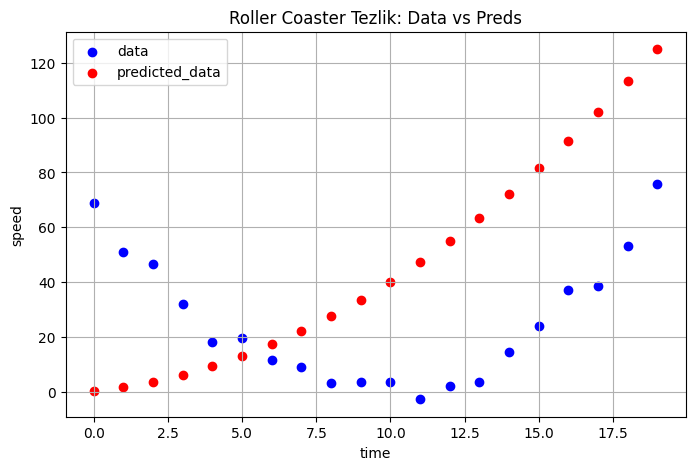

In [ ]:
def show_preds(preds, time=None, targets=None,
               title='Speed: Actual vs Predicted',
               xlabel='time', ylabel='speed',
               pred_style='ro', target_style='bo', legend_loc='best'):
    """
    preds: Tensor yoki array, bashorat qilingan qiymatlar
    time: Tensor yoki array, vaqt nuqtalari; agar None bo‘lsa, 0,1,2,... indekslari ishlatiladi
    targets: Tensor yoki array, haqiqiy ma’lumotlar; yo‘q bo‘lsa, faqat preds chiziladi
    Stil: e.g., 'ro' = qizil doira, 'bo' = ko‘k doira
    """
    
    # to change to NumPy

    preds = preds.detach().cpu().numpy() if isinstance(preds, torch.Tensor) else np.asarray(preds)
    if time is None:
        time = np.arange(len(preds))
    else:
        time = time.detach().cpu().numpy() if isinstance(time, torch.Tensor) else np.asarray(time)
    if targets is not None:
        targets = targets.detach().cpu().numpy() if isinstance(targets, torch.Tensor) else np.asarray(targets)
        if not (len(time) == len(preds) == len(targets)):
            raise ValueError("time, preds va targets bir xil uzunlikda bo‘lishi kerak")

    plt.figure(figsize=(8, 5))
    
    # actual point

    if targets is not None:
        plt.scatter(time, targets, c=target_style[0], label='data', marker=target_style[1] if len(target_style)>1 else 'o')
   
    # Prediction

    plt.scatter(time, preds, c=pred_style[0], label='predicted_data', marker=pred_style[1] if len(pred_style)>1 else 'o')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=legend_loc)
    plt.grid(True)
    plt.show()


# to plot restult

show_preds(preds, time=time, targets=speed,
           title='Roller Coaster Tezlik: Data vs Preds',
           xlabel='time', ylabel='speed',
           pred_style='ro', target_style='bo')

In [119]:
def apply_step(params, prn = True):
          preds = f(time, params)
          loss = mse(preds, speed)
          loss.backward()
          params.data -= lr*params.grad.data
          params.grad = None
          if prn: print(loss.item())
          return preds

=> to train model any epoch

In [120]:
for epoch in range(10):
          apply_step(params)

915754.0
7297607663616.0
5.8196930555858125e+19
4.641087177001829e+26
3.7011733224148014e+33
inf
inf
inf
inf
inf
